### Mushroom classification
- learning method: supervised learning, classification
- learning algorithm: decision-tree, logistic regression, ensemble voting
- datasets: mushrooms.csv
- 
- if I do, regression survivered rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
file_path = '../data/mushrooms.csv'
mushroom_df = pd.read_csv(file_path)

- class: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
mushroom_df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [10]:
mushroom_df['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [12]:
mask = mushroom_df['stalk-root'] == '?'
mushroom_df.loc[mask, 'class'].value_counts()

class
p    1760
e     720
Name: count, dtype: int64

- 저걸 날려야 하나.. 말아야 하나...

In [17]:
label_encode = pd.DataFrame(columns=mushroom_df.columns)
label_encode

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [20]:
for col in label_encode.columns:
    names = mushroom_df[col].unique().tolist() 
    mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
    label_encode[col] = mushroom_df[col].map(mapping)

In [21]:
label_encode.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [22]:
import seaborn as sns

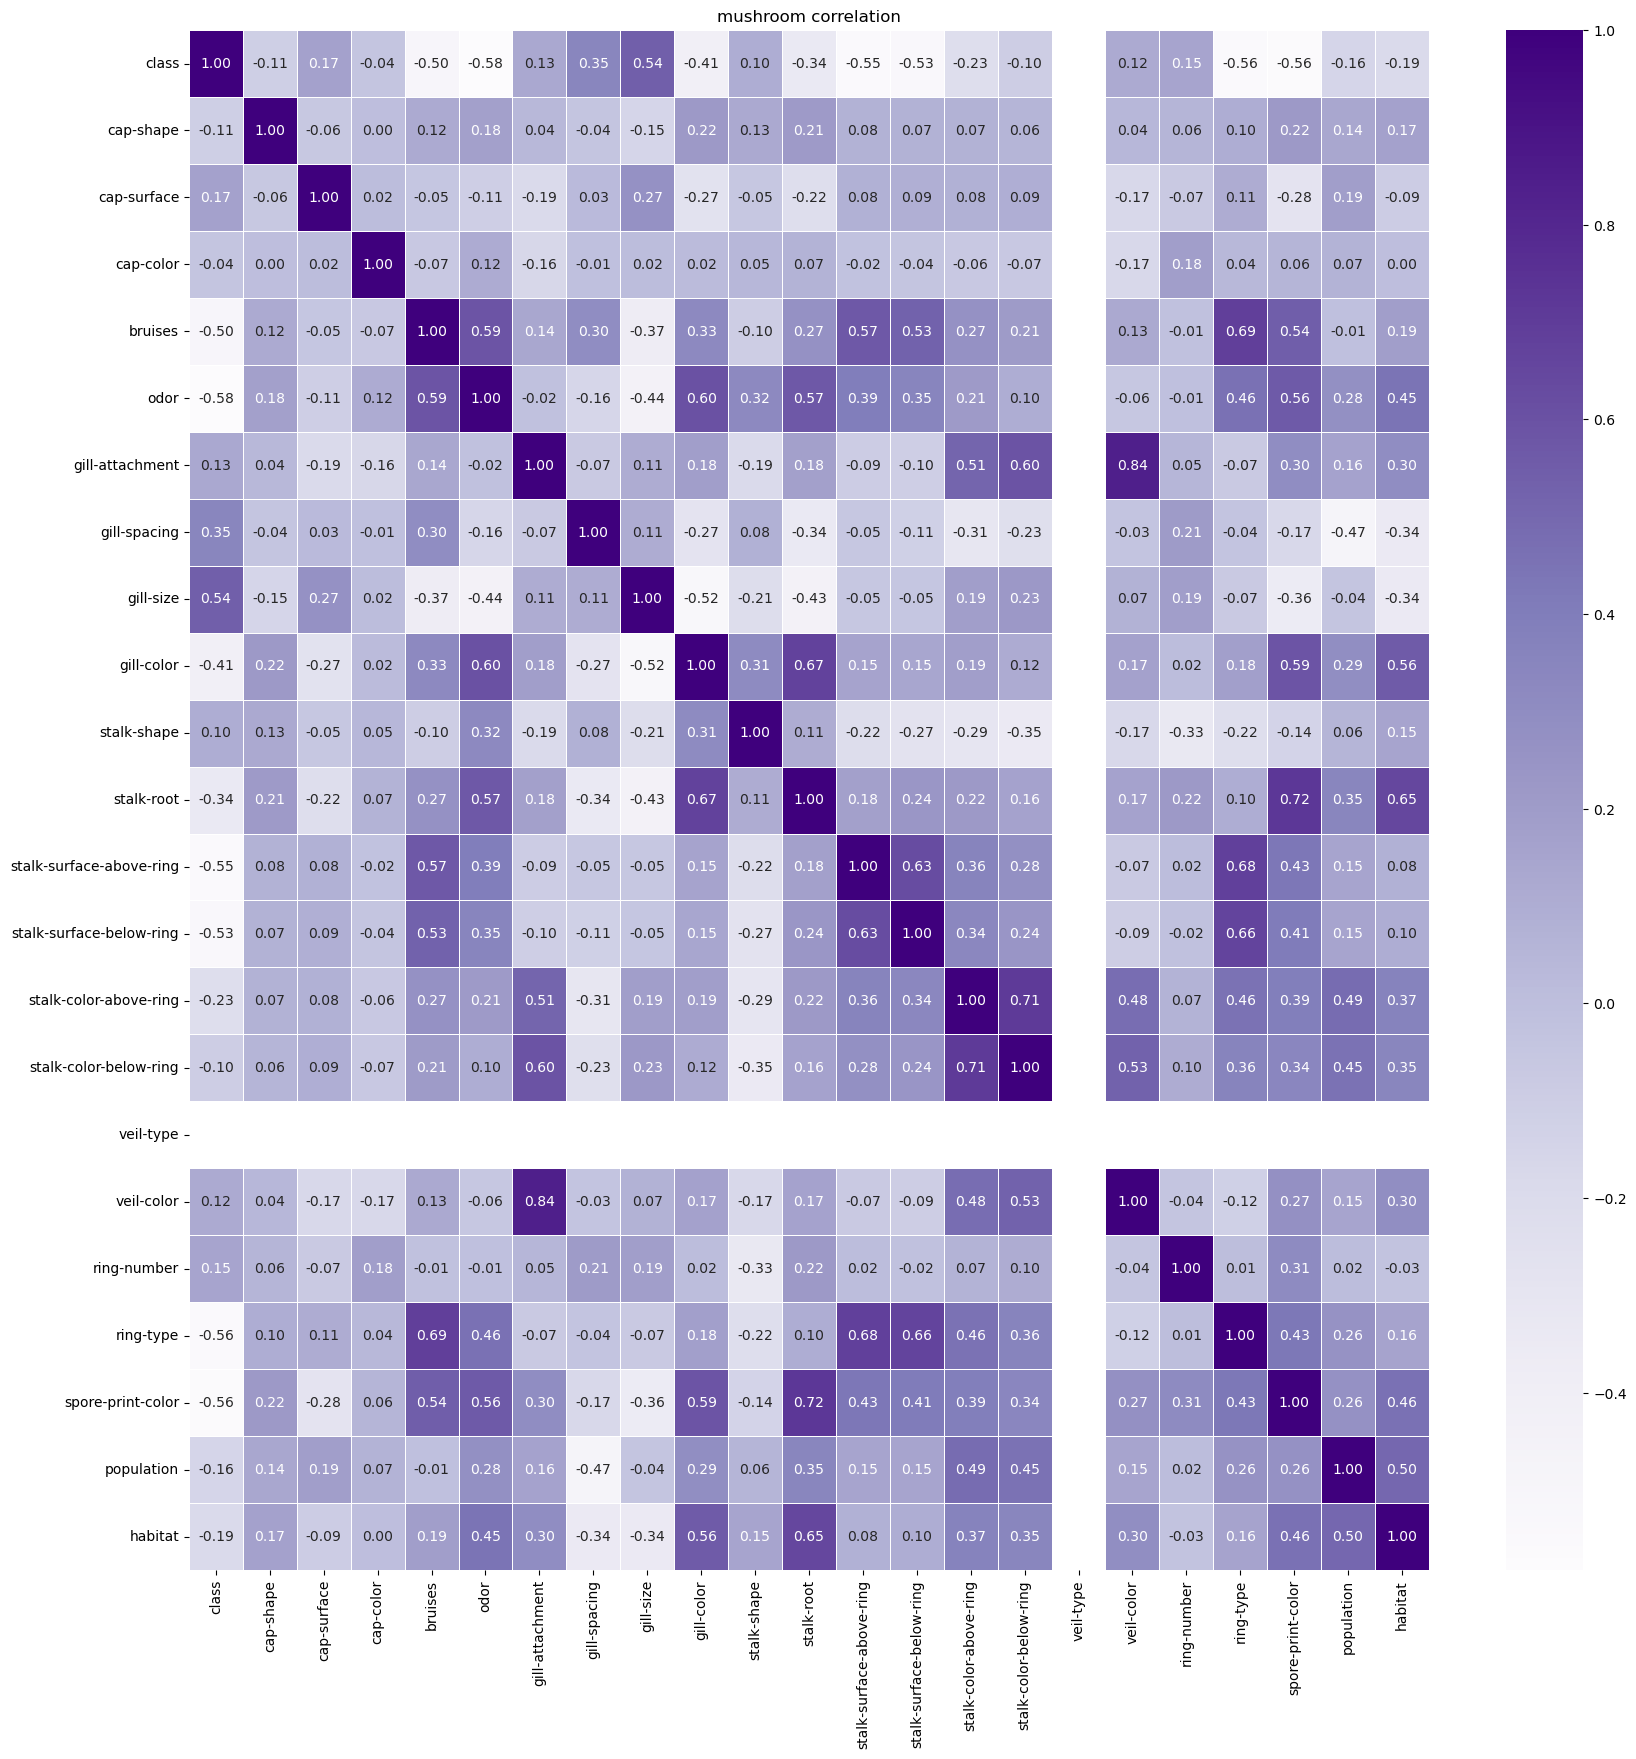

In [23]:
corr_mushroom = label_encode.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_mushroom, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title('mushroom correlation')
plt.show()

In [24]:
label_encode['veil-type'].value_counts()

veil-type
0    8124
Name: count, dtype: int64

In [26]:
label = label_encode['class']
feature = label_encode.drop(columns=['class'])

print(f"feature: {feature.shape}, {feature.ndim}D")
print(f"label: {label.shape}, {label.ndim}D")

feature: (8124, 22), 2D
label: (8124,), 1D


In [27]:
# train : test = 70 : 30
# statify : ne_label
# random_state: 14

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=14, stratify=label)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train test ratio: {len(X_train)/len(feature)*100:.2f} %, {len(X_test)/len(feature)*100:.2f} %")

X train: (5686, 22), 2D
y train: (5686,), 1D

X test: (2438, 22), 2D
y test: (2438,), 1D

train test ratio: 69.99 %, 30.01 %


- encoding decision tree classifier
    - label: class
    - feature: exclusion class and all columns
    - hyperparameter: default

In [29]:
# model instance
# hyperparameter: default
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
dtc_train_score = dtc.score(X_train, y_train)
dtc_test_score = dtc.score(X_test, y_test)

print(f"train score: {dtc_train_score*100:.2f} %")
print(f"test score: {dtc_test_score*100:.2f} %")

train score: 100.00 %
test score: 100.00 %


In [32]:
import graphviz
from sklearn.tree import export_graphviz

In [33]:
mushroom_df['class'].unique()

array(['p', 'e'], dtype=object)

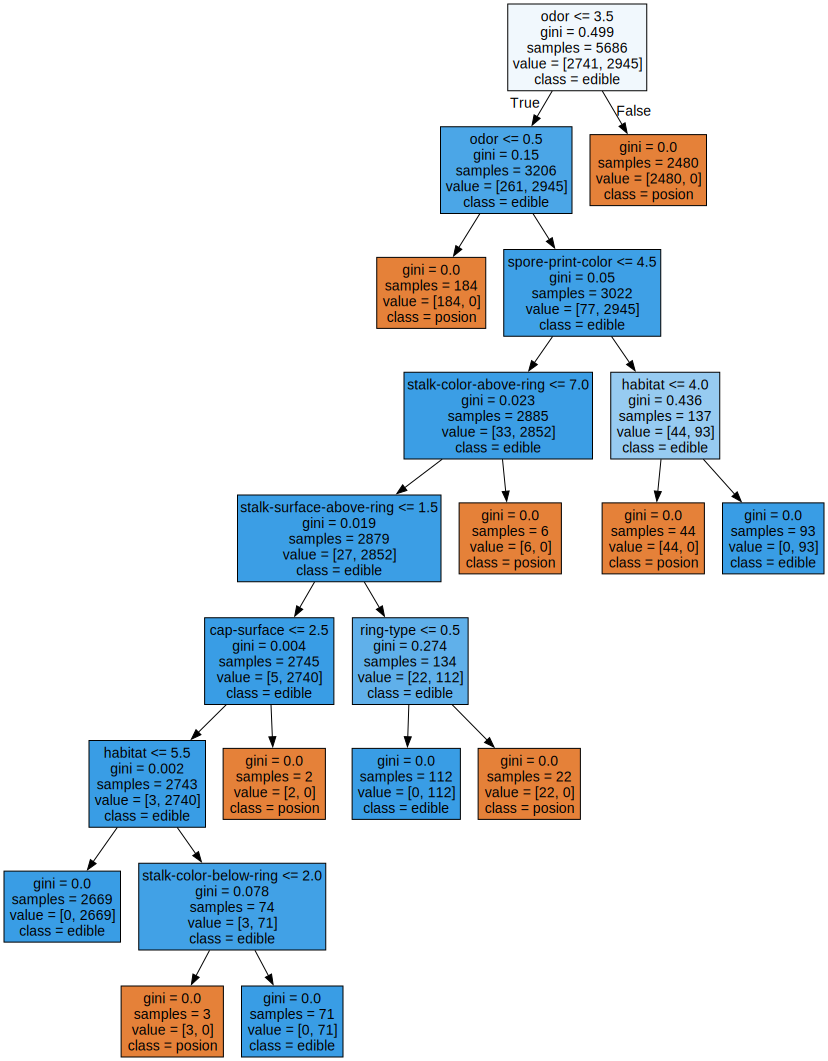

In [34]:
export_graphviz(dtc, out_file='../data/mushroom_tree.dot', class_names=['posion', 'edible'],
                feature_names=dtc.feature_names_in_, impurity=True, filled=True)

with open('../data/mushroom_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

- 그림을 그려보니 너무 구데기라서 최적의 dtc를 찾아보기로 결정

In [44]:
dtc_params = {'max_depth':[8, 6, 4, 2], 'min_samples_split':[8, 6, 4, 2],
              'criterion':['gini', 'entorpy'], 'splitter':['best', 'random']}

In [45]:
dtc_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=dtc_params, cv=10, refit=True, return_train_score=True)
dtc_grid.fit(X_train, y_train)

c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entorpy'],
                         'max_depth': [8, 6, 4, 2],
                         'min_samples_split': [8, 6, 4, 2],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [46]:
# model parameter
best_dtc = dtc_grid.best_estimator_
print(f"best_params_: {dtc_grid.best_params_}")
print(f"bets_score_: {dtc_grid.best_score_}")
print(f"best_estimator_: {dtc_grid.best_estimator_}")

best_params_: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8, 'splitter': 'best'}
bets_score_: 1.0
best_estimator_: DecisionTreeClassifier(max_depth=8, min_samples_split=8)


In [47]:
dtc_result = dtc_grid.cv_results_
dtc_result_df = pd.DataFrame(dtc_result)
dtc_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']]


,mean_train_score,mean_test_score,rank_test_score
0,1.000000,1.0,1
1,1.000000,1.0,1
2,1.000000,1.0,1
3,0.999941,1.0,1
4,1.000000,1.0,1
...,...,...,...
59,NaN,NaN,33
60,NaN,NaN,33
61,NaN,NaN,33
62,NaN,NaN,33


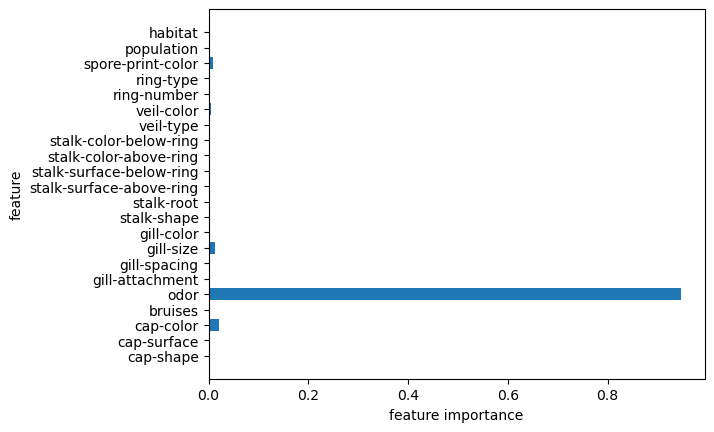

In [48]:
plt.barh(range(best_dtc.n_features_in_), best_dtc.feature_importances_, align='center')
plt.yticks(np.arange(best_dtc.n_features_in_), best_dtc.feature_names_in_)
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.show()

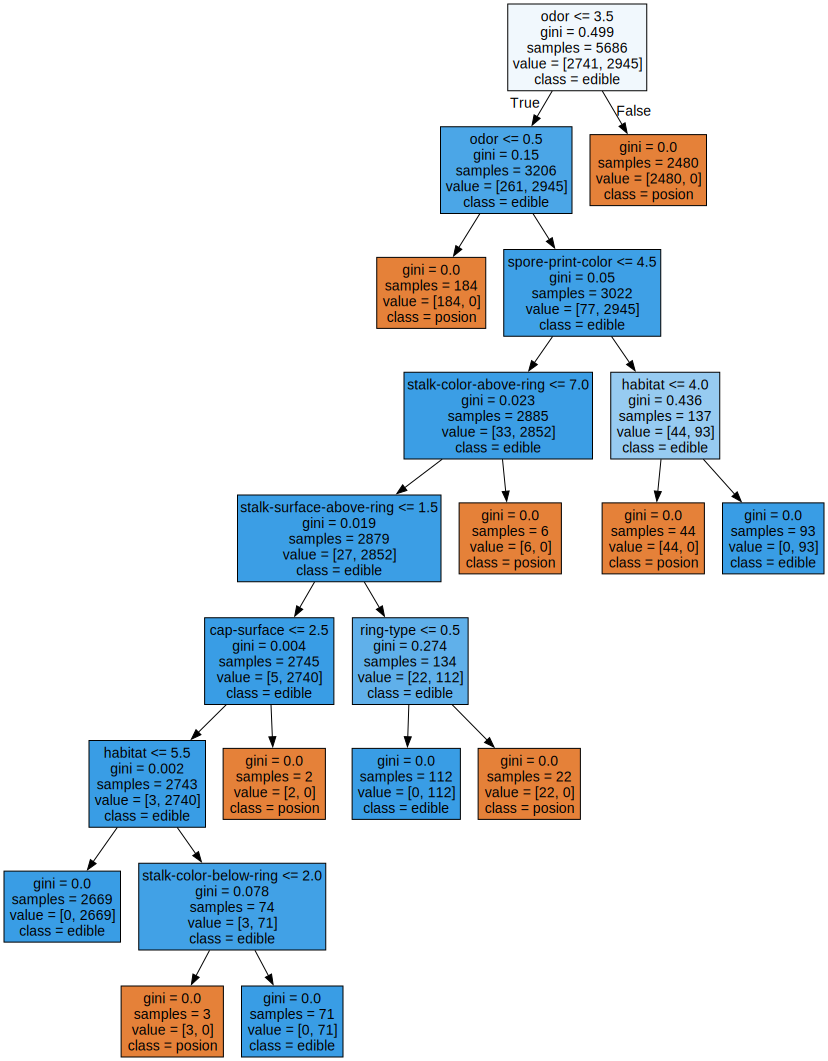

In [49]:
export_graphviz(dtc, out_file='../data/best_mushroom_tree.dot', class_names=['posion', 'edible'],
                feature_names=dtc.feature_names_in_, impurity=True, filled=True)

with open('../data/best_mushroom_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)